In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

**Step 1 - Importing and exploring data**

In [272]:
# Load and sense-check the data
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

In [273]:
# Sense-check the DataFrames
print("Columns in ad DataFrame:")
print(ad.columns)
print("Number of rows and columns in ad DataFrame:", ad.shape)
print(ad.info())
print(ad.describe())

print("\nColumns in ar DataFrame:")
print(ar.columns)
print("Number of rows and columns in ar DataFrame:", ar.shape)
print(ar.info())
print(ar.describe())

print("\nColumns in nc DataFrame:")
print(nc.columns)
print("Number of rows and columns in nc DataFrame:", nc.shape)
print(nc.info())
print(nc.describe())

Columns in ad DataFrame:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Number of rows and columns in ad DataFrame: (137793, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)

In [274]:
# Objective 1: Number of locations
num_locations = nc['sub_icb_location_name'].nunique()
print("Number of locations in the data set:", num_locations)

# Objective 2: Five locations with the highest number of records
top_locations = nc['sub_icb_location_name'].value_counts().head(5)
print("Five locations with the highest number of records:")
print(top_locations)

# Objective 3: Number of service settings, context types, national categories, and appointment statuses
num_service_settings = nc['service_setting'].nunique()
num_context_types = nc['context_type'].nunique()
num_national_categories = nc['national_category'].nunique()
num_appointment_statuses = ar['appointment_status'].nunique()

print("Number of service settings:", num_service_settings)
print("Number of context types:", num_context_types)
print("Number of national categories:", num_national_categories)
print("Number of appointment statuses:", num_appointment_statuses)

Number of locations in the data set: 106
Five locations with the highest number of records:
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64
Number of service settings: 5
Number of context types: 3
Number of national categories: 18
Number of appointment statuses: 3


**Step 2 - Analysing the data**

**Question 1: Between what dates were appointments scheduled?**

In [275]:
# Convert the date columns to datetime format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

In [276]:
# Sense-check the DataFrames with dtypes and head() method
print("Data types and head of ad DataFrame:")
print(ad.dtypes)
print(ad.head())

print("\nData types and head of ar DataFrame:")
print(ar.dtypes)
print(ar.head())

print("\nData types and head of nc DataFrame:")
print(nc.dtypes)
print(nc.head())

Data types and head of ad DataFrame:
sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00

In [277]:
# Determine the date range of scheduled appointments for each DataFrame
ad_date_range = (ad['appointment_date'].min(), ad['appointment_date'].max())
ar_date_range = (ar['appointment_month'].min(), ar['appointment_month'].max())
nc_date_range = (nc['appointment_date'].min(), nc['appointment_date'].max())

print("Date range of scheduled appointments for ad DataFrame:", ad_date_range)
print("Date range of scheduled appointments for ar DataFrame:", ar_date_range)
print("Date range of scheduled appointments for nc DataFrame:", nc_date_range)

Date range of scheduled appointments for ad DataFrame: (Timestamp('2021-12-01 00:00:00'), Timestamp('2022-06-30 00:00:00'))
Date range of scheduled appointments for ar DataFrame: (Timestamp('2020-01-01 00:00:00'), Timestamp('2022-06-01 00:00:00'))
Date range of scheduled appointments for nc DataFrame: (Timestamp('2021-08-01 00:00:00'), Timestamp('2022-06-30 00:00:00'))


**Question 2: Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?**

In [278]:
# Create a subset of the nc DataFrame for NHS North West London ICB - W2U3Z
nc_subset_nw_london = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z'].copy()

In [279]:
# Convert the date column to datetime format
nc_subset_nw_london['appointment_date'] = pd.to_datetime(nc_subset_nw_london['appointment_date'])

In [280]:
# Filter the DataFrame for the specified date range
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-06-01')
nc_subset_nw_london = nc_subset_nw_london[(nc_subset_nw_london['appointment_date'] >= start_date) & (nc_subset_nw_london['appointment_date'] < end_date)]

In [281]:
# Determine the number of service settings in the subset
num_service_settings_nw_london = nc_subset_nw_london['service_setting'].nunique()

In [282]:
# Determine the service setting that reported the most appointments
most_appointments_service_setting = nc_subset_nw_london['service_setting'].value_counts().idxmax()

print("Number of service settings in North West London from 1 January to 1 June 2022:", num_service_settings_nw_london)
print("Service setting with the most appointments in North West London from 1 January to 1 June 2022:", most_appointments_service_setting)

Number of service settings in North West London from 1 January to 1 June 2022: 5
Service setting with the most appointments in North West London from 1 January to 1 June 2022: General Practice


 **Question 3: Which month had the highest number of appointments?**

In [283]:
# Calculate the total number of appointments per month
appointments_per_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).size()

In [284]:
# Sort the appointments by the count of appointments in descending order
sorted_appointments = appointments_per_month.sort_values(ascending=False)

In [285]:
# Identify the month with the highest number of appointments
highest_month = sorted_appointments.index[0]

print("Month with the highest number of appointments:", highest_month)

Month with the highest number of appointments: (2022, 3)


**Question 4: What was the total number of records per month?**

In [286]:
records_per_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).size()
print("Total number of records per month:")
print(records_per_month)

Total number of records per month:
appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
dtype: int64


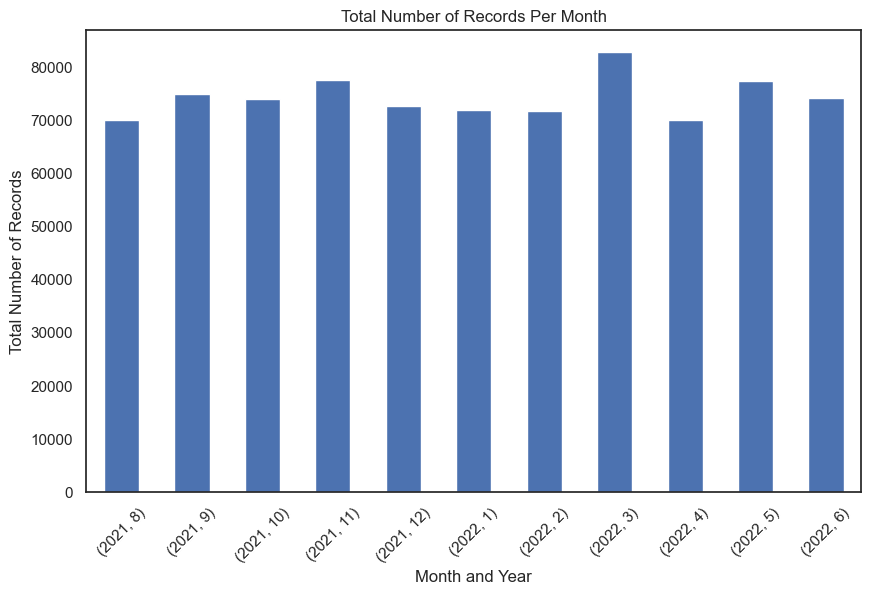

appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
dtype: int64


In [305]:
# Visualize the total number of records per month using a bar plot
records_per_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Month and Year")
plt.ylabel("Total Number of Records")
plt.title("Total Number of Records Per Month")
plt.xticks(rotation=45)
plt.show()

print(records_per_month)

**Step 3 - Visualising and identifying initial trends**

In [288]:
# Objective 1
# Set figure size
plt.figure(figsize=(15, 12))

# Set Seaborn plot style
sns.set(style="whitegrid")

# Change data type of appointment_month column to string for ease of visualisation
nc['appointment_month'] = nc['appointment_month'].astype(str)

<Figure size 1500x1200 with 0 Axes>

In [289]:
# Aggregate the appointments per month, context types and national categories and create new DataFrames for each.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

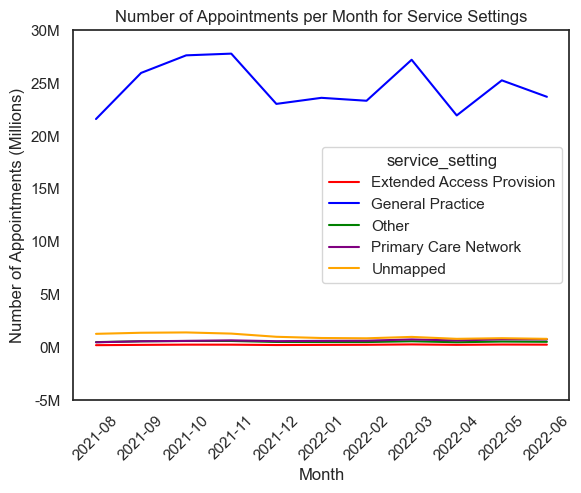

In [321]:
# Create a line plot for service settings using Seaborn.

# Assuming the y-axis values are in millions (e.g., 1 million = 10000000)
scale_factor = 1000000

# Line plot for service settings
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss)
plt.title('Number of Appointments per Month for Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45)

# Format y-axis ticks to show millions
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(t/scale_factor)}M' for t in plt.yticks()[0]])
plt.show()

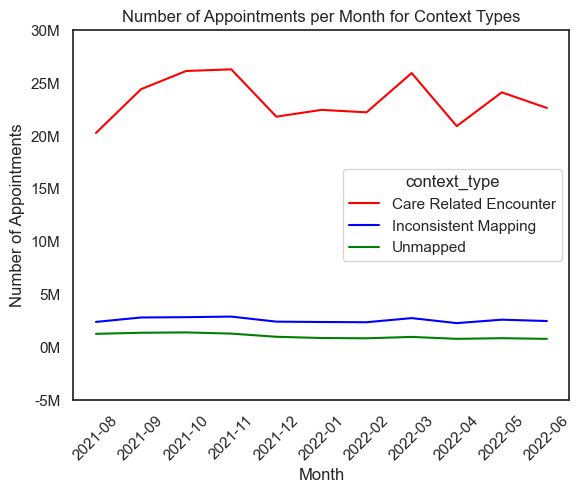

In [320]:
# Repeat for Context Type

# Assuming the y-axis values are in millions (e.g., 1 million = 10000000)
scale_factor = 1000000

# Line plot for context types
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct)
plt.title('Number of Appointments per Month for Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Format y-axis ticks to show millions
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(t/scale_factor)}M' for t in plt.yticks()[0]])
plt.show()

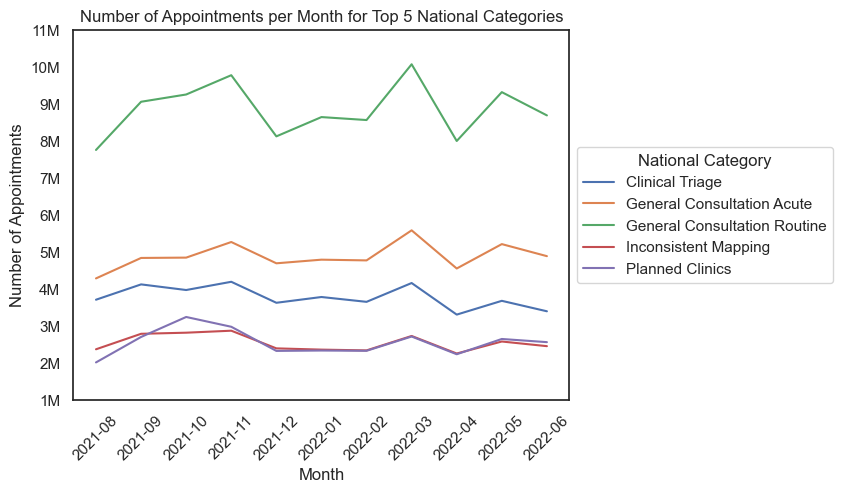

    appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
193           2022-06   
194           2022-06   
195           2022-06   
196           2022-06   
197           2022-06   

                                                       national_category  \
0    Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                        Care Home Visit   
2                                                        Clinical Triage   
3                                             General Consultation Acute   
4                                           General Consultation Routine   
..                                                                   ...   
193                                           Social Prescribing Service   
194                                         Structured Medication Review   
195            

In [346]:
# Assuming the y-axis values are in millions (e.g., 1 million = 1000000)
scale_factor = 1000000

# Calculate the total number of appointments for each national category
total_appointments_by_category = nc_nc.groupby('national_category')['count_of_appointments'].sum()

# Sort the national categories based on the total number of appointments
sorted_categories = total_appointments_by_category.sort_values(ascending=False)

# Select the top 5 national categories
top_5_categories = sorted_categories.head(5)

# Filter the nc_nc DataFrame to include only the top 5 national categories
nc_nc_top_5 = nc_nc[nc_nc['national_category'].isin(top_5_categories.index)]

# Line plot for the top 5 national categories
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc_top_5)
plt.title('Number of Appointments per Month for Top 5 National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Format y-axis ticks to show millions
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(t/scale_factor)}M' for t in plt.yticks()[0]])

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='National Category')
plt.show()
print(nc_nc)

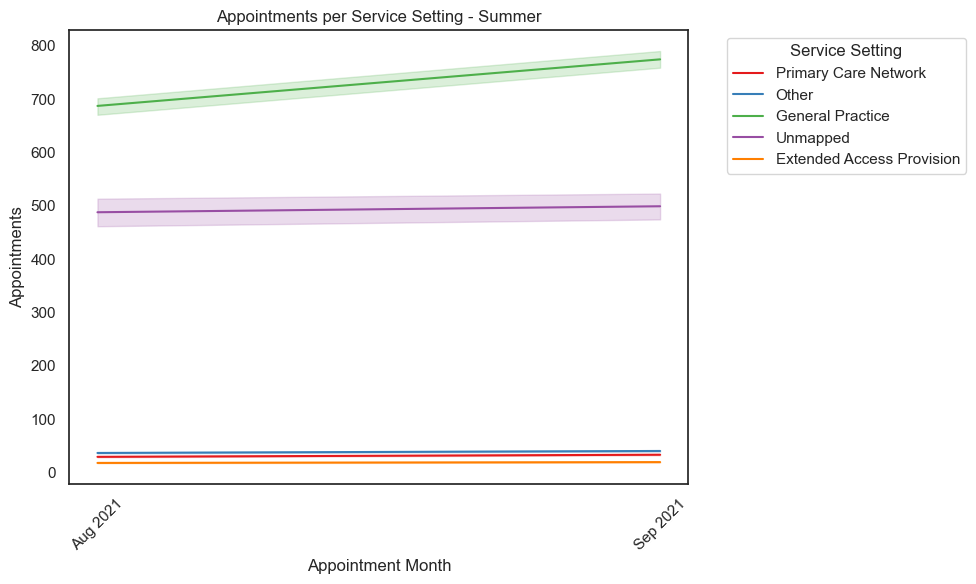

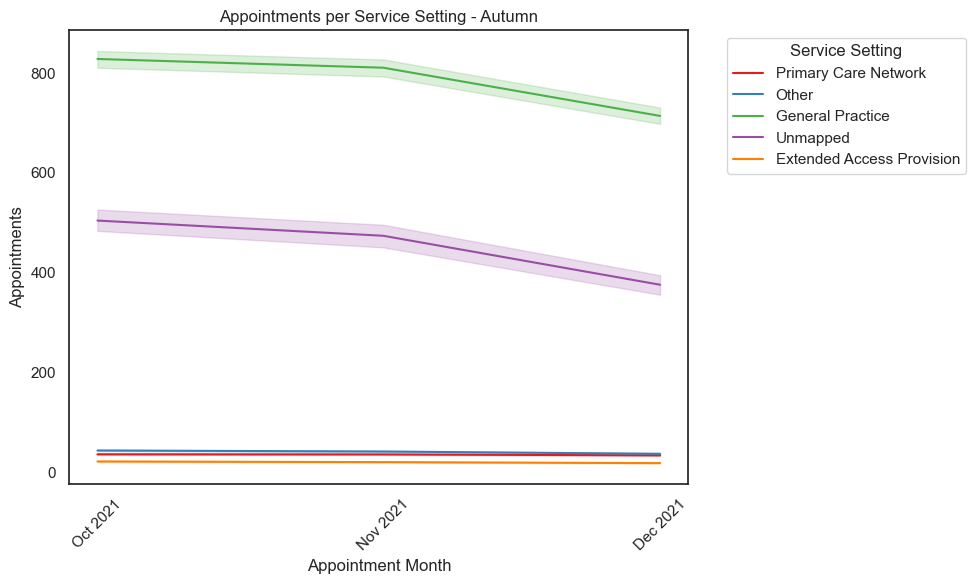

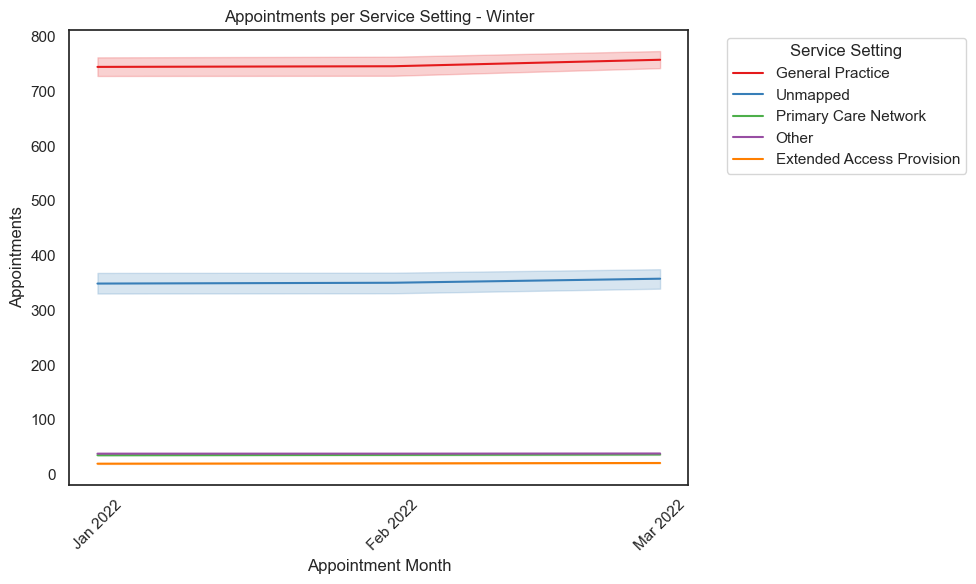

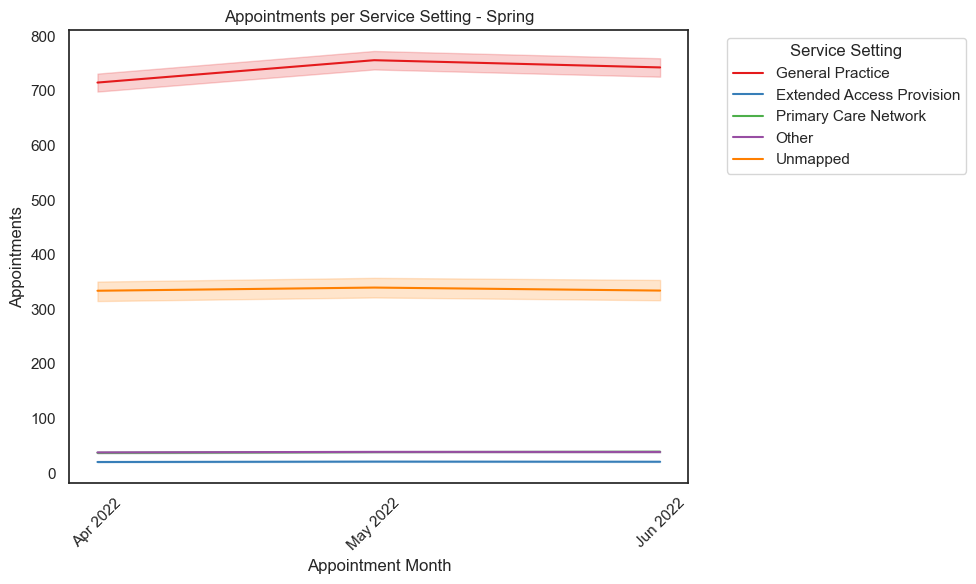

In [325]:
# Objective 2

custom_palette = sns.color_palette("Set1", n_colors=len(nc['service_setting'].unique()))

# Set the custom color palette
sns.set_palette(custom_palette)

# Ensure that the appointment_month column is in datetime format
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# Create a dictionary to map each season to its respective months
seasons = {
    'Summer': [8, 9],
    'Autumn': [10, 11, 12],
    'Winter': [1, 2, 3],
    'Spring': [4, 5, 6]
}

# Create a line plot for each season
for season, months in seasons.items():
    season_data = nc[nc['appointment_month'].dt.month.isin(months)]
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size for each plot
    sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=season_data)
    plt.title(f"Appointments per Service Setting - {season}")
    plt.xlabel('Appointment Month')
    plt.ylabel('Appointments')
    plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set the x-axis locator and formatter to show only the relevant months for each season
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

**Step 4 - Analysing NHS-related Twitter data**

In [326]:
# Set the figure size and plot style
sns.set(style="white")
plt.figure(figsize=(15, 12))

# Set the maximum column width of the DataFrame
pd.options.display.max_colwidth = 200

<Figure size 1500x1200 with 0 Axes>

In [327]:
#Load the tweets.csv file into a DataFrame
tweets = pd.read_csv('tweets.csv')

# Display the first five rows of the DataFrame
print(tweets.head())

# Explore the data using describe() and info()
print(tweets.describe())
print(tweets.info())

# Explore tweet_retweet_count and tweet_favorite_count columns
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

              tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                  

In [328]:
# Create a new DataFrame with only text values
tweets_text = tweets['tweet_full_text']

# Initialize an empty list for hashtags
tags = []

# Extract hashtags from the tweet_full_text column
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

# Convert the list to a Pandas Series and count the values
tags = pd.Series(tags).value_counts()

# Display the first 30 records
print(tags.head(30))

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

          word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38


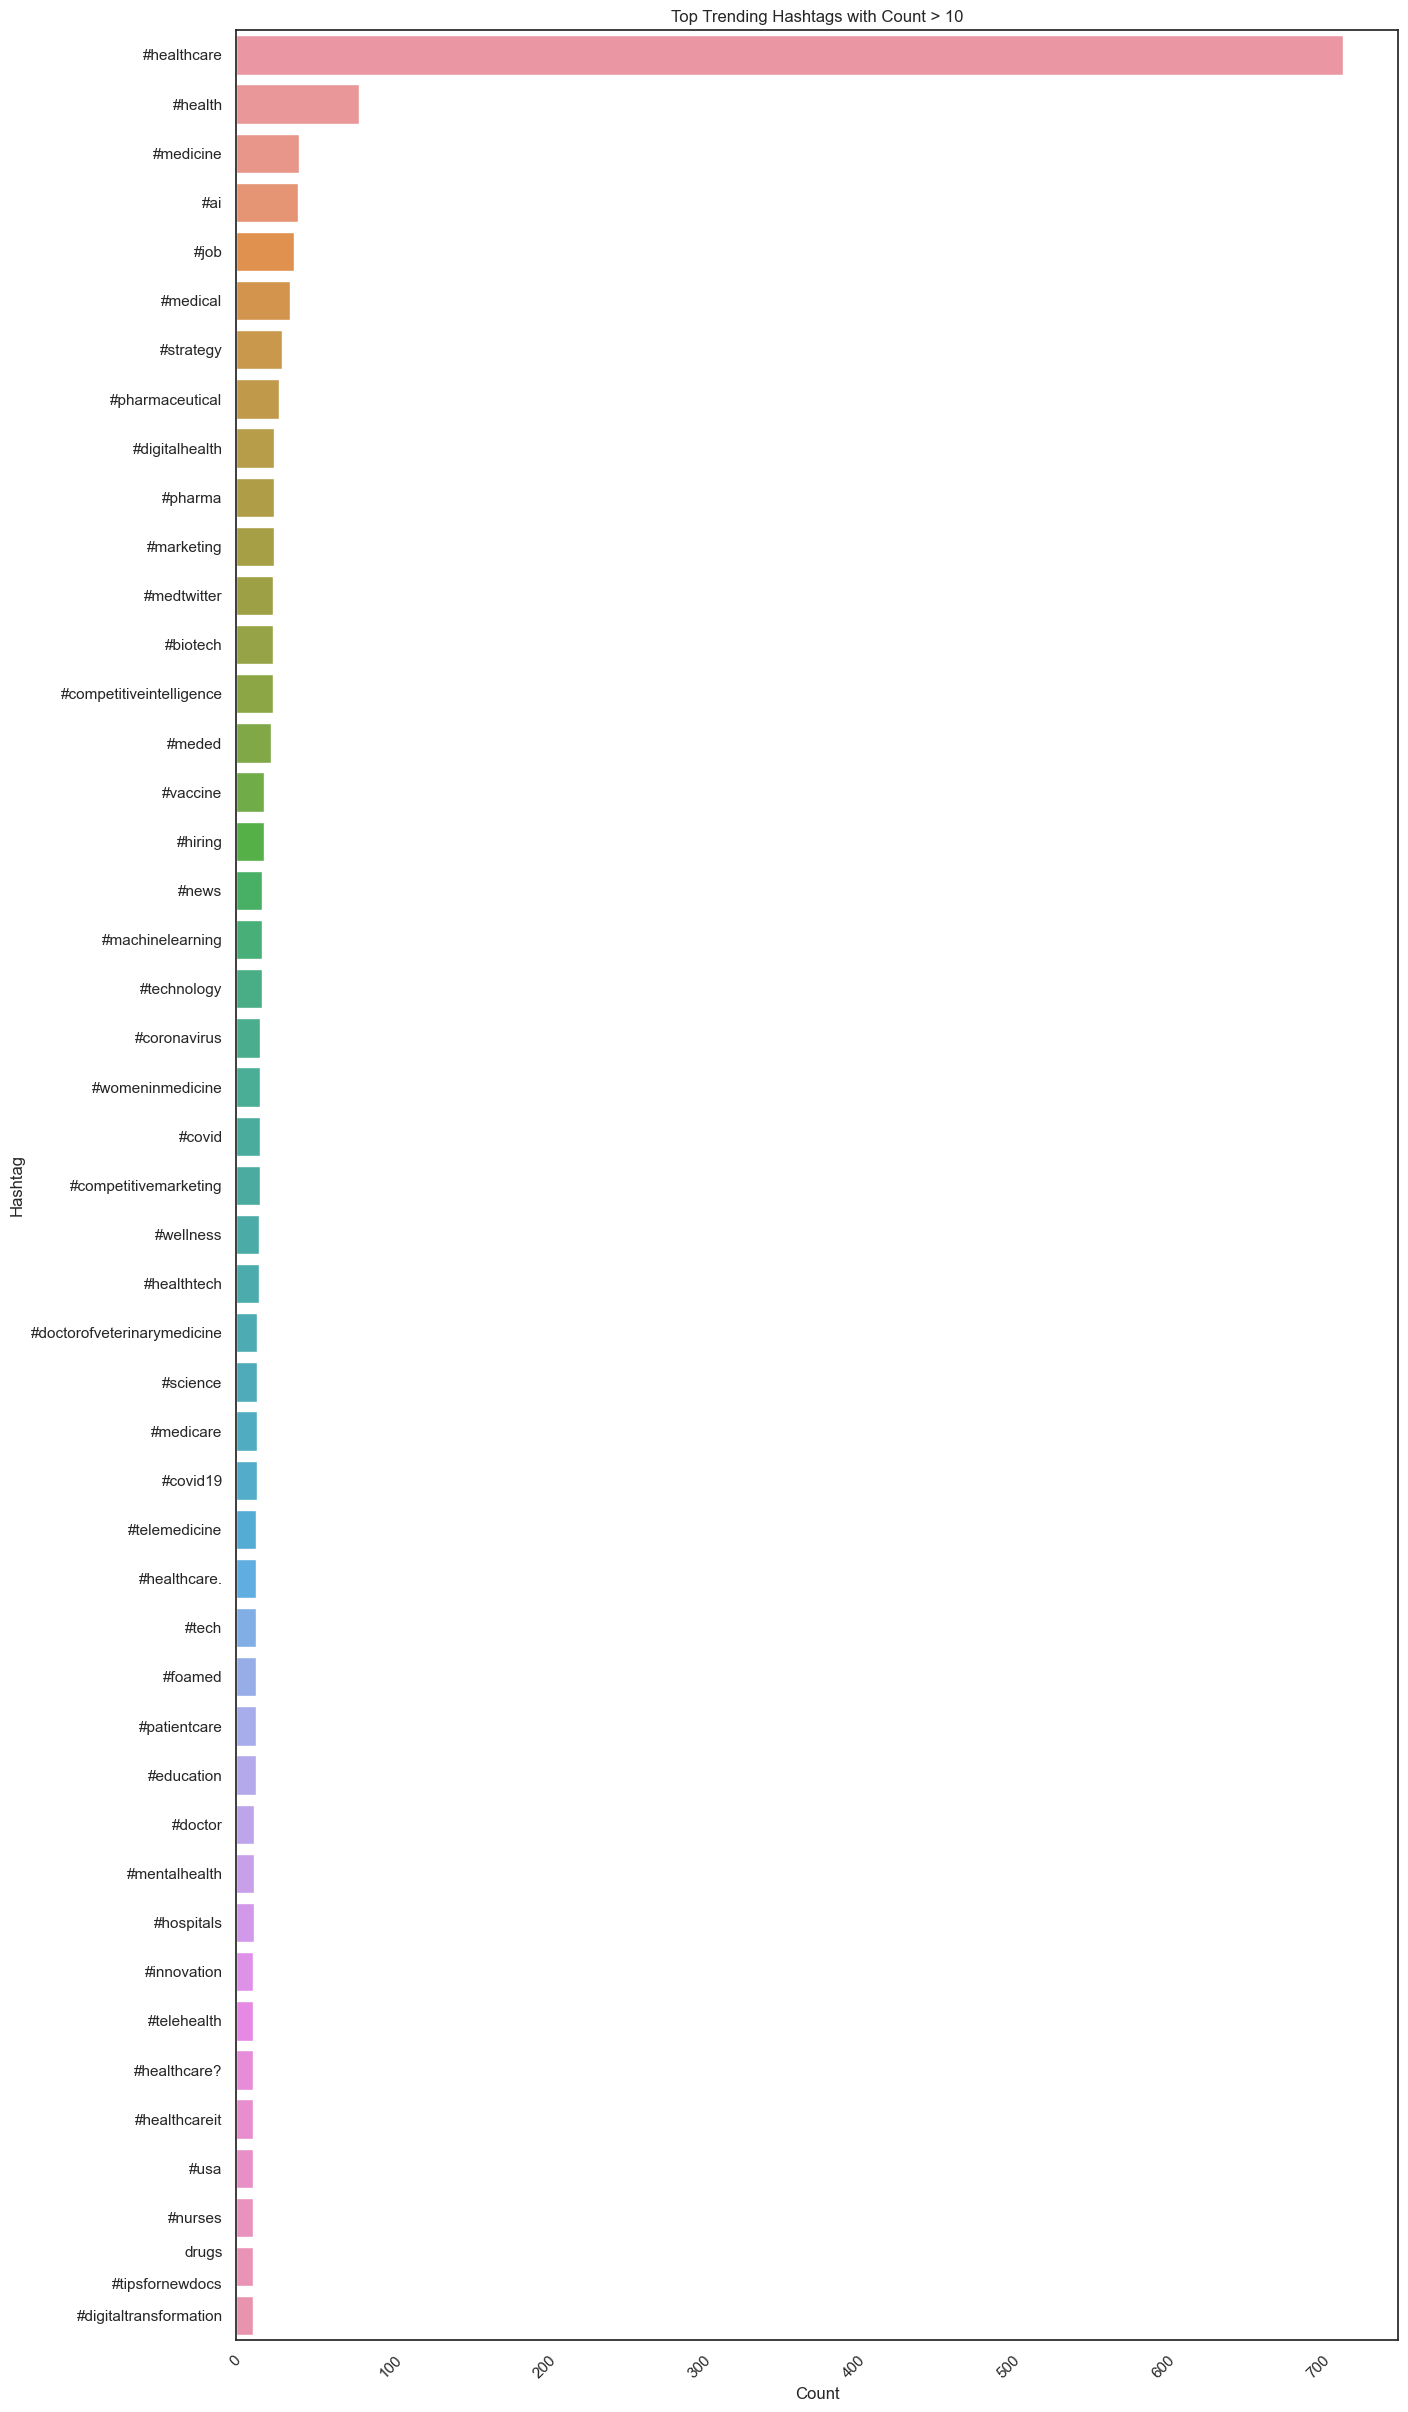

In [329]:
# Convert the Series to a DataFrame and reset the index
data = tags.reset_index()

# Rename the columns
data.columns = ['word', 'count']

# Convert the count data type to integer
data['count'] = data['count'].astype(int)

# Sense-check the DataFrame
print(data.head())

# Create a barplot of all records with count > 10
plt.figure(figsize=(15, 30))  # Increase the width of the figure
sns.barplot(x='count', y='word', data=data[data['count'] > 10])
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.title('Top Trending Hashtags with Count > 10')
plt.xticks(rotation=45)  # Rotate the y-axis labels by 45 degrees
plt.show()

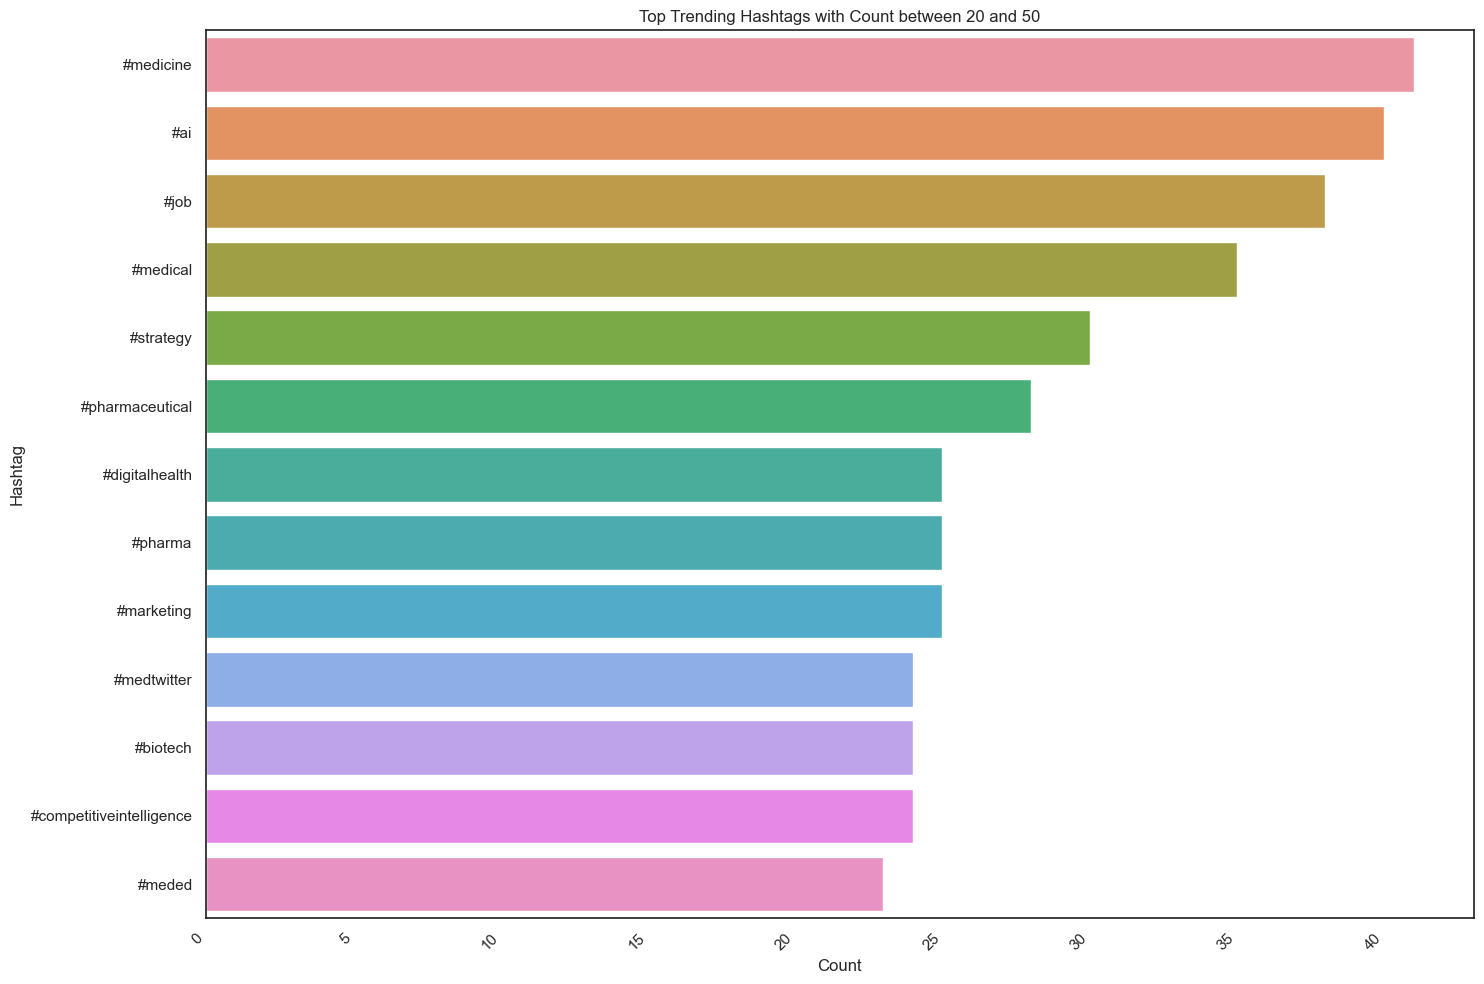

                        word  count
2                  #medicine     41
3                        #ai     40
4                       #job     38
5                   #medical     35
6                  #strategy     30
7            #pharmaceutical     28
8             #digitalhealth     25
9                    #pharma     25
10                #marketing     25
11               #medtwitter     24
12                  #biotech     24
13  #competitiveintelligence     24
14                    #meded     23


In [339]:
# Remove overrepresented hashtags and create a barplot of the remaining most frequently used hashtags

plt.figure(figsize=(15, 10)) #Increase the width of the figure
sns.barplot(x='count', y='word', data=data[(data['count'] >= 20) & (data['count'] <= 50) & data['word'].str.startswith('#')])
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.title('Top Trending Hashtags with Count between 20 and 50')
plt.xticks(rotation=45)  # Rotate the y-axis labels by 45 degrees

# Rotate the 'Hashtag' labels for better readability.
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Filter the DataFrame to include only count values from 20 to 50
filtered_data = data[(data['count'] >= 20) & (data['count'] <= 50)]

# Display the filtered DataFrame
print(filtered_data)

 **Step 5 - Making recommendations**

Question 1 - Should the NHS start looking at increasing staff levels?

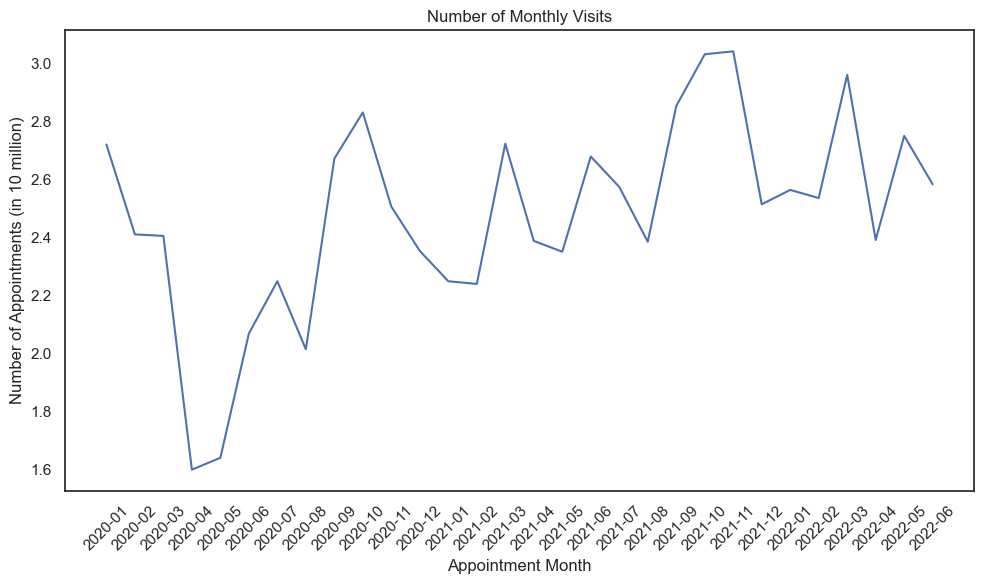

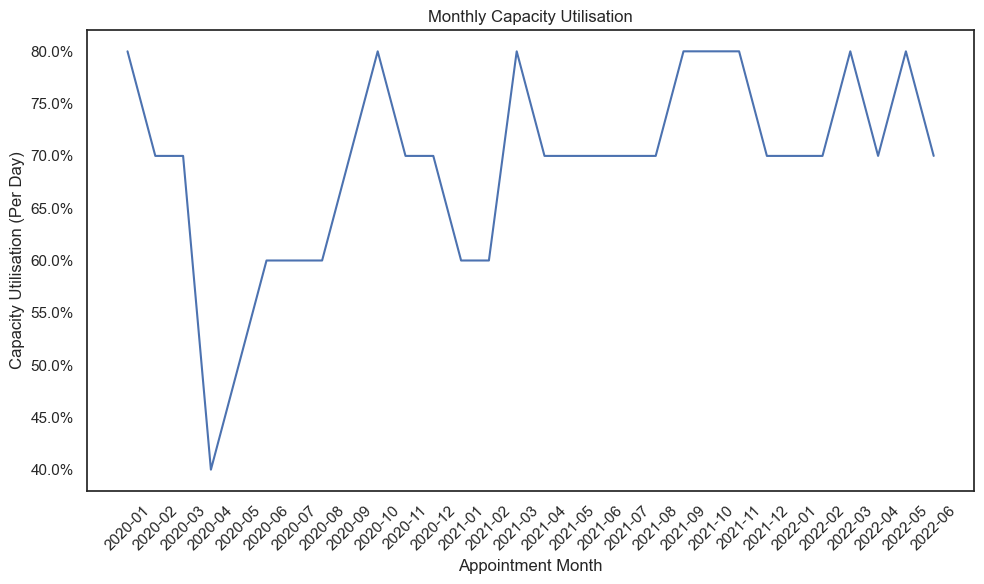

   appointment_month  count_of_appointments  utilisation
0            2020-01               27199296          0.8
1            2020-02               24104621          0.7
2            2020-03               24053468          0.7
3            2020-04               16007881          0.4
4            2020-05               16417212          0.5
5            2020-06               20690805          0.6
6            2020-07               22491437          0.6
7            2020-08               20150520          0.6
8            2020-09               26714255          0.7
9            2020-10               28301932          0.8
10           2020-11               25061602          0.7
11           2020-12               23535936          0.7
12           2021-01               22492069          0.6
13           2021-02               22399569          0.6
14           2021-03               27225424          0.8
15           2021-04               23879932          0.7
16           2021-05           

In [342]:
# Create a new DataFrame (ar_agg) to review the different features
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]

# Group by appointment_month and calculate the sum of count_of_appointments
ar_agg = ar_agg.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()

# Create a new DataFrame (ar_df) to determine the total number of appointments per month
ar_df = ar[['appointment_month', 'count_of_appointments']]
ar_df = ar_df.groupby('appointment_month').sum().reset_index()

# Add a new column 'utilisation' to calculate the average utilisation of service per day
ar_df['utilisation'] = ar_df['count_of_appointments'] / 1200000 / 30 # Daily capacity is 1,200,000
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# Change the datatype of appointment_month to string for both DataFrames
ar_agg['appointment_month'] = ar_agg['appointment_month'].dt.strftime('%Y-%m')
ar_df['appointment_month'] = ar_df['appointment_month'].dt.strftime('%Y-%m')

# Create a lineplot indicating the number of monthly visits
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)
plt.title('Number of Monthly Visits')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments (in 10 million)')
plt.xticks(rotation=45)

# Customize y-axis tick labels using FuncFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e7:.1f}'))  # Display 1 decimal place
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Show integer ticks only
plt.tight_layout()

plt.show()

# Create a lineplot indicating the monthly capacity utilisation
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='utilisation', data=ar_df)
plt.title('Monthly Capacity Utilisation')
plt.xlabel('Appointment Month')
plt.ylabel('Capacity Utilisation (Per Day)')
plt.xticks(rotation=45)


# Customize y-axis tick labels using FuncFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1%}'))
plt.tight_layout()

plt.show()

print (ar_df)

Question 2 - How do the healthcare professional types differ over time?

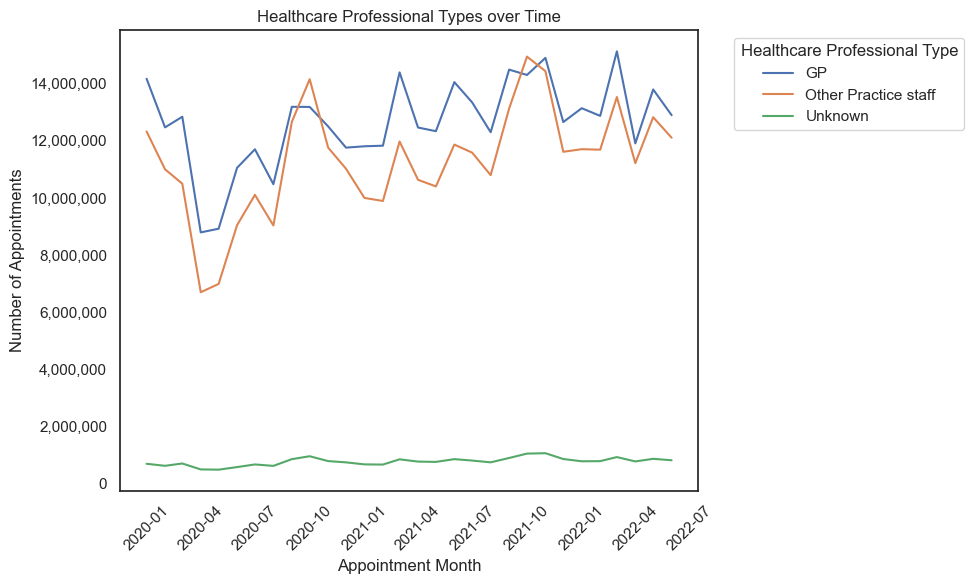

   appointment_month              hcp_type  count_of_appointments
0         2020-01-01                    GP               14168932
1         2020-01-01  Other Practice staff               12326031
2         2020-01-01               Unknown                 704333
3         2020-02-01                    GP               12467976
4         2020-02-01  Other Practice staff               11002550
..               ...                   ...                    ...
85        2022-05-01  Other Practice staff               12823200
86        2022-05-01               Unknown                 878374
87        2022-06-01                    GP               12893983
88        2022-06-01  Other Practice staff               12105677
89        2022-06-01               Unknown                 828418

[90 rows x 3 columns]


In [343]:
# Group by appointment_month and hcp_type, and calculate the sum of count_of_appointments
hcp_type_sum = ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to analyze healthcare professional types over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=hcp_type_sum)
plt.title('Healthcare Professional Types over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Healthcare Professional Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

print(hcp_type_sum)

Question 3 - Are there significant changes in whether or not visits are attended?

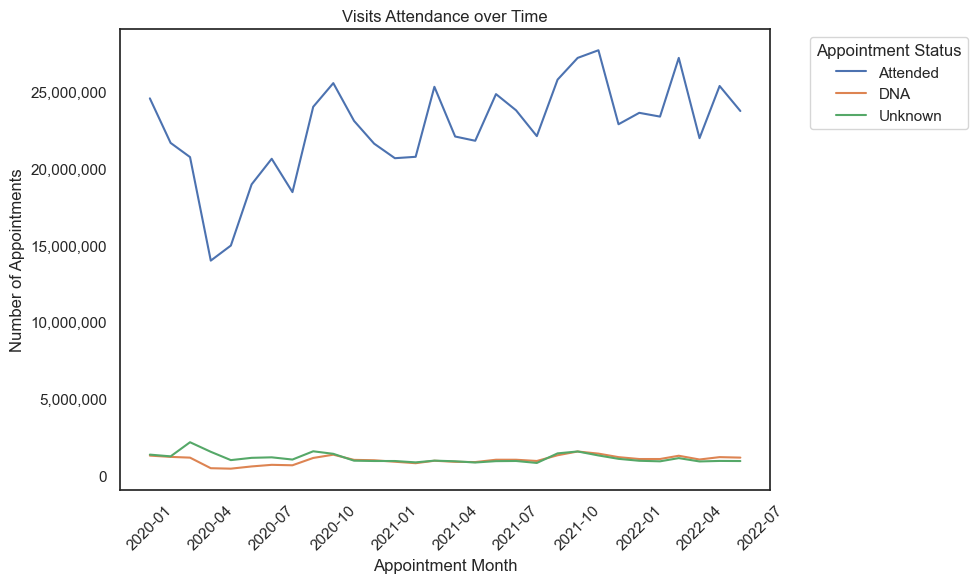

In [301]:
# Group by appointment_month and appointment_status, and calculate the sum of count_of_appointments
appointment_status_sum = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to analyze whether visits are attended over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=appointment_status_sum)
plt.title('Visits Attendance over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

Question 4 - Are there changes in terms of appointment type and the busiest months?

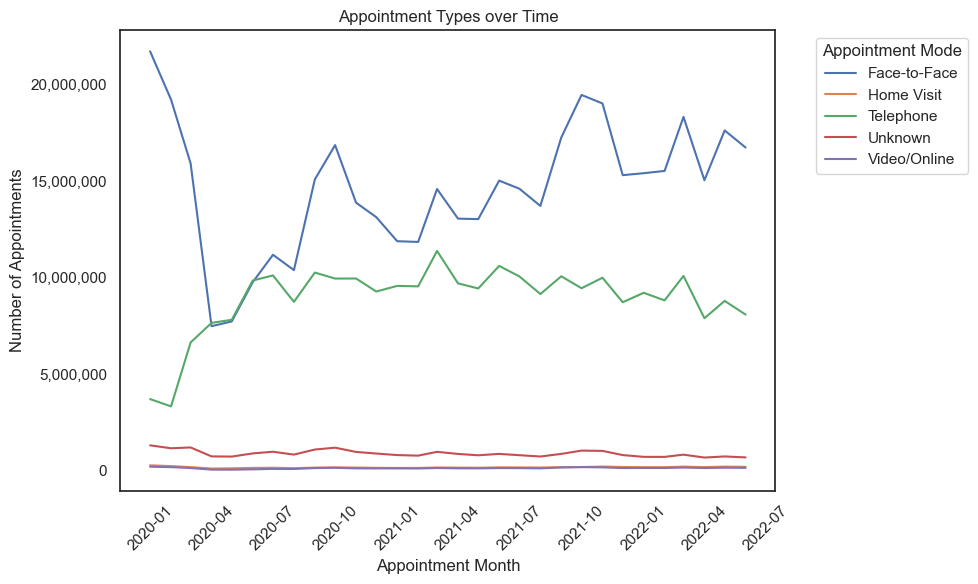

    appointment_month appointment_mode  count_of_appointments
0          2020-01-01     Face-to-Face               21733394
1          2020-01-01       Home Visit                 266942
2          2020-01-01        Telephone                3701775
3          2020-01-01          Unknown                1302979
4          2020-01-01     Video/Online                 194206
..                ...              ...                    ...
145        2022-06-01     Face-to-Face               16744191
146        2022-06-01       Home Visit                 187640
147        2022-06-01        Telephone                8082270
148        2022-06-01          Unknown                 677860
149        2022-06-01     Video/Online                 136117

[150 rows x 3 columns]


In [344]:
# Group by appointment_month and appointment_mode, and calculate the sum of count_of_appointments
appointment_mode_sum = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to analyze changes in appointment types over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=appointment_mode_sum)
plt.title('Appointment Types over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

print(appointment_mode_sum)

Question 5 - Are there any trends in time between booking an appointment?

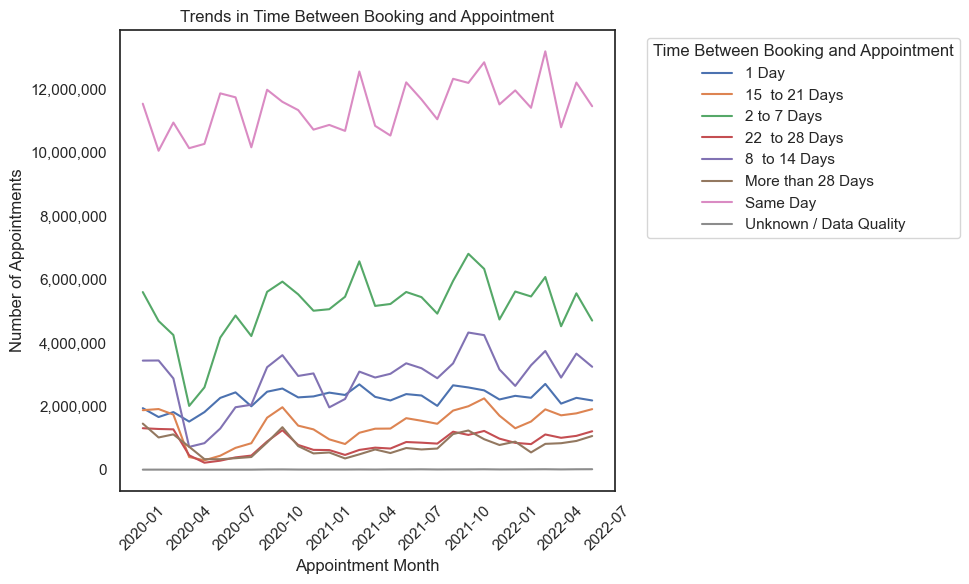

In [303]:
# Group by appointment_month and time_between_book_and_appointment, and calculate the sum of count_of_appointments
time_between_sum = ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to analyze trends in time between booking and appointment
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=time_between_sum)
plt.title('Trends in Time Between Booking and Appointment')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Time Between Booking and Appointment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

Question 6  - How do the various service settings compare?

   appointment_month            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                 160927
1         2021-08-01           General Practice               21575852
2         2021-08-01                      Other                 449101
3         2021-08-01       Primary Care Network                 432448
4         2021-08-01                   Unmapped                1233843
5         2021-09-01  Extended Access Provision                 187906
6         2021-09-01           General Practice               25940821
7         2021-09-01                      Other                 527174
8         2021-09-01       Primary Care Network                 530485
9         2021-09-01                   Unmapped                1336115
10        2021-10-01  Extended Access Provision                 209539
11        2021-10-01           General Practice               27606171
12        2021-10-01                      Other                 556487
13    

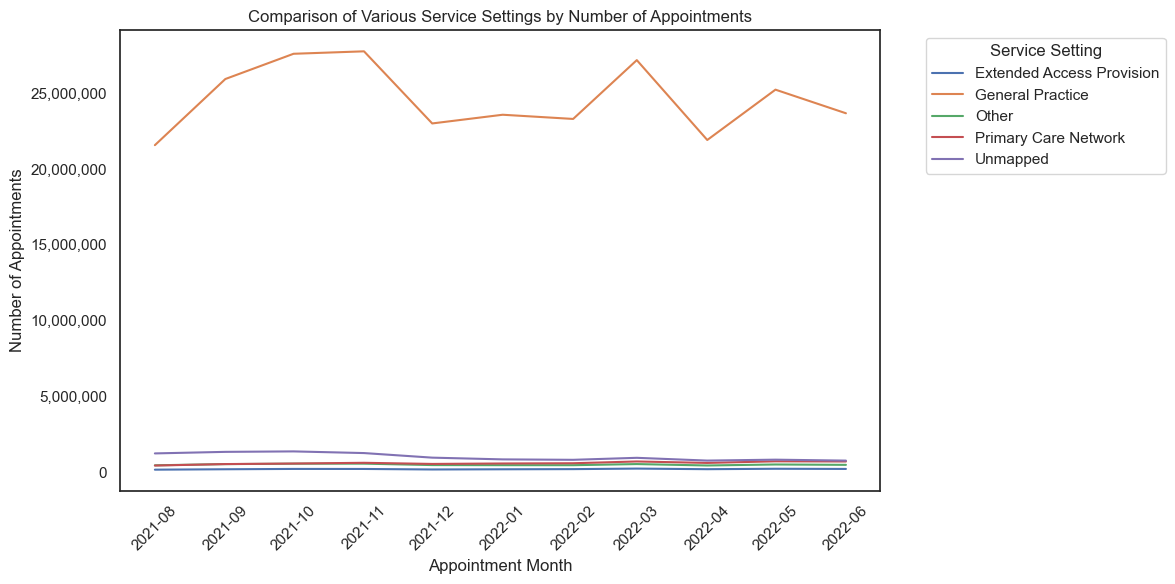

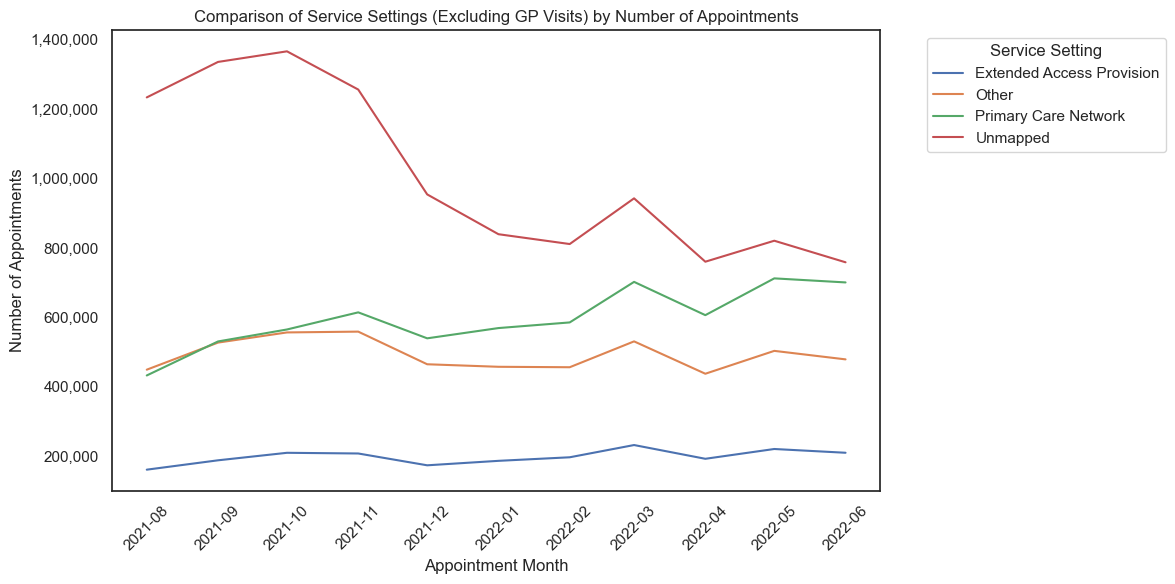

In [304]:
# Load the national_categories.xlsx file and create a DataFrame
national_categories_df = pd.read_excel('national_categories.xlsx')

# Convert the appointment_month to datetime format
national_categories_df['appointment_month'] = pd.to_datetime(national_categories_df['appointment_month'])

# Group by appointment_month and service_setting, and calculate the sum of count_of_appointments
service_settings_sum = national_categories_df.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the DataFrame
print(service_settings_sum)

# Create a line plot to compare the various service settings by the number of appointments
plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=service_settings_sum)
plt.title('Comparison of Various Service Settings by Number of Appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

# Create a second line plot excluding GP visits
plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=service_settings_sum[service_settings_sum['service_setting'] != 'General Practice'])
plt.title('Comparison of Service Settings (Excluding GP Visits) by Number of Appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis ticks to display the true number of appointments
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()
